In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import optimal_velocity

In [2]:
X_C, X_C1, X_C2 = 2.0, 3.2, 4.0
A_PARAM, B_PARAM = 5.0, 1.0

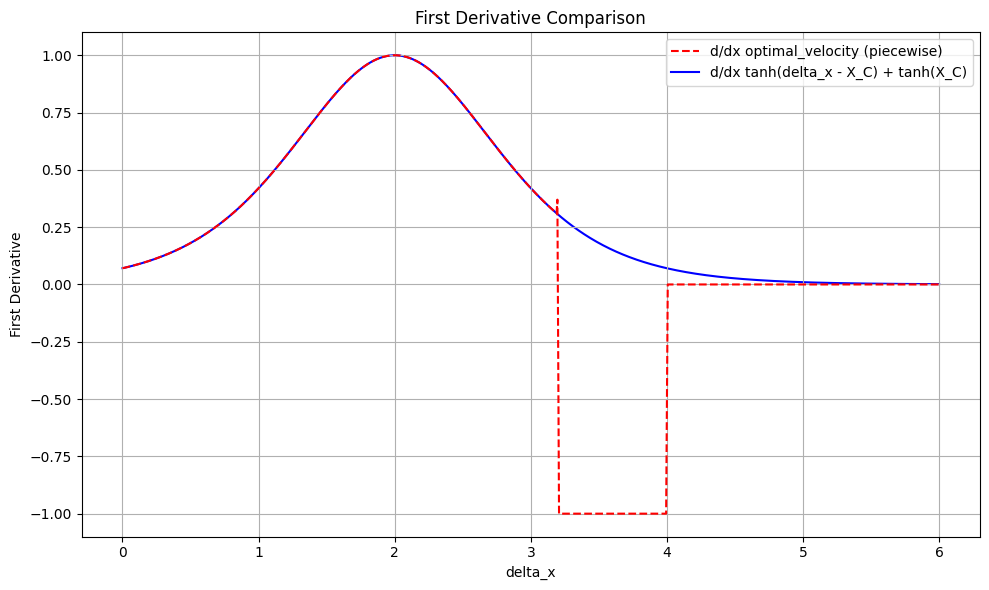

In [7]:
vectorized_optimal_velocity = np.vectorize(optimal_velocity)

# Smooth formula
def tanh_formula(delta_x: np.ndarray) -> np.ndarray:
    return np.tanh(delta_x - X_C) + np.tanh(X_C)

# Numerical derivative using central difference
def numerical_derivative(f_vals, x_vals):
    dx = x_vals[1] - x_vals[0]
    deriv = np.zeros_like(f_vals)
    deriv[1:-1] = (f_vals[2:] - f_vals[:-2]) / (2 * dx)
    deriv[0] = (f_vals[1] - f_vals[0]) / dx
    deriv[-1] = (f_vals[-1] - f_vals[-2]) / dx
    return deriv

# Evaluation range
x_vals = np.linspace(0, 6, 1000)
y_piecewise = vectorized_optimal_velocity(x_vals)
y_tanh = tanh_formula(x_vals)

# Compute derivatives
dy_piecewise = numerical_derivative(y_piecewise, x_vals)
dy_tanh = numerical_derivative(y_tanh, x_vals)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_vals, dy_piecewise, 'r--', label="d/dx optimal_velocity (piecewise)", zorder=2)
plt.plot(x_vals, dy_tanh, 'b-', label="d/dx tanh(delta_x - X_C) + tanh(X_C)", zorder=1)
plt.xlabel("delta_x")
plt.ylabel("First Derivative")
plt.title("First Derivative Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
